## Lab 8: Principal Component Analysis (PCA) - solution
### Feature Engineering
#### Solutions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Bank customer segmentation
#### Use PCA to improve cluster analysis

- Import and inspect the "credit_card.csv" dataset
- Remove a column which cannot be used efficiently as a feature, and impute missing data (you can use the method "ffill"). Inspect the cleaned data set. What data types does it now include?
- Inspect the features for multicollinearity - plot a heat map of the correlation coefficients
- Scale the features (you can use the standard scaler since we don't need to worry about dummy categorical variables)
- Perform K-means cluster analysis: plot K-means inertia vs number of clusters. Can you identify the elbow point?
- Perform PCA and visualize the explained variance ratio vs number of principal components
- Plot a heat map of correlation coefficients for the principal components
- Plot a K-means elbow curve for the first 3 principal components. Did the PCA transformation make the elbow curve become more expressive? Do you see any improvements in the silhouette score?
- For the selected number of clusters, plot a pairplot of the first 3 principal component using cluster label as the hue

In [2]:
df = pd.read_csv('../data/credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df = df.drop(columns = 'CUST_ID')
df = df.fillna(method = 'ffill')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

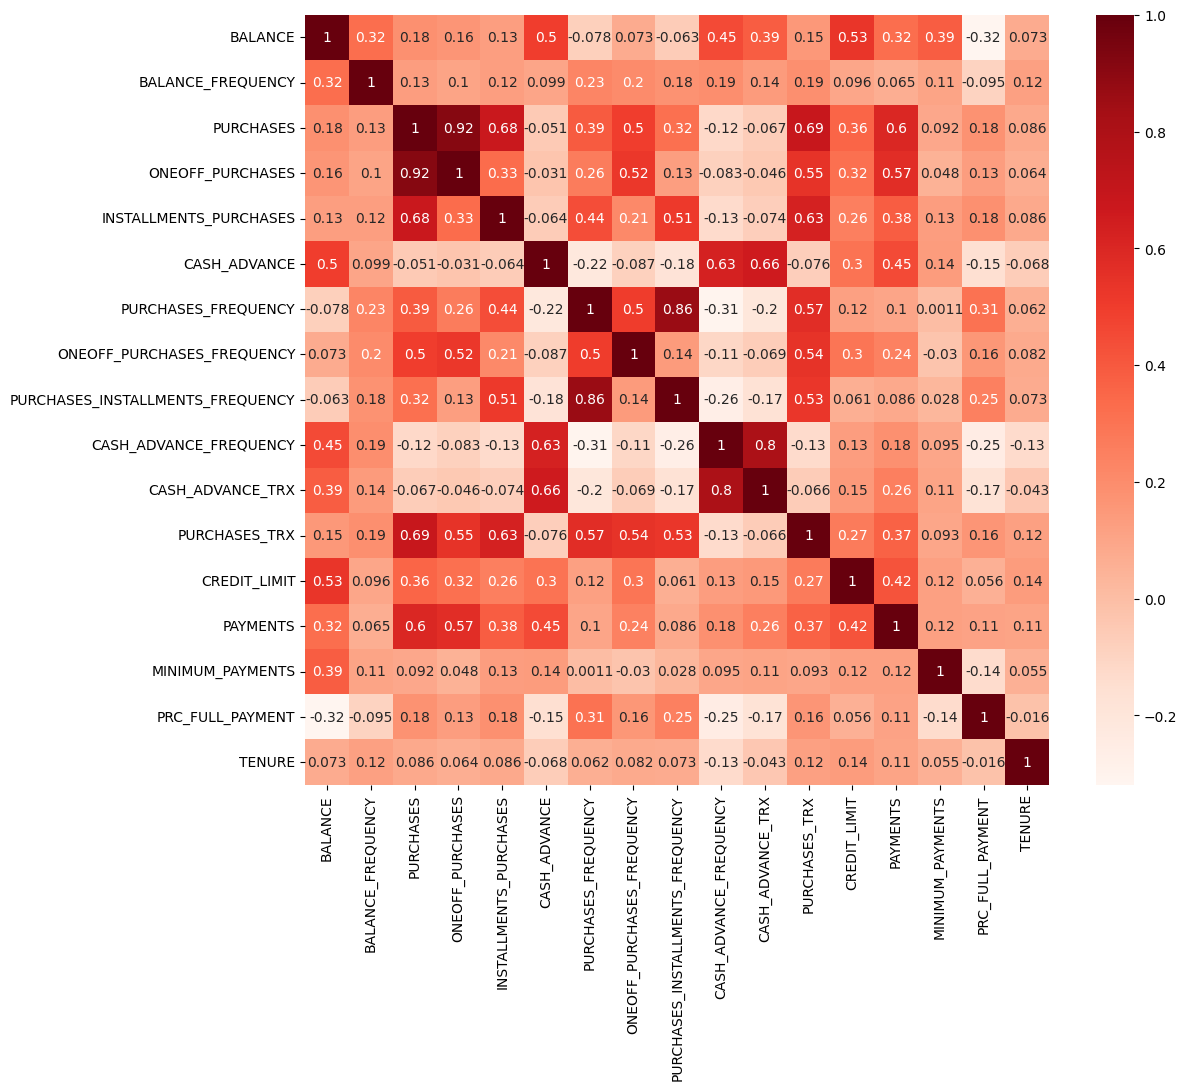

In [6]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

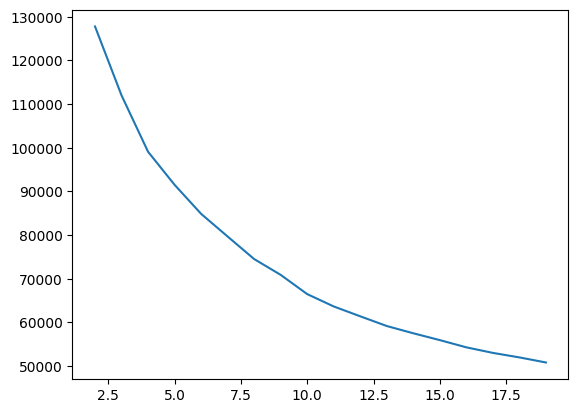

In [8]:
inertia = []
silhouette = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) 
    silhouette.append(silhouette_score(X, kmeans.fit_predict(X)))
sns.lineplot(y = inertia, x = range(2, 20))
plt.show()

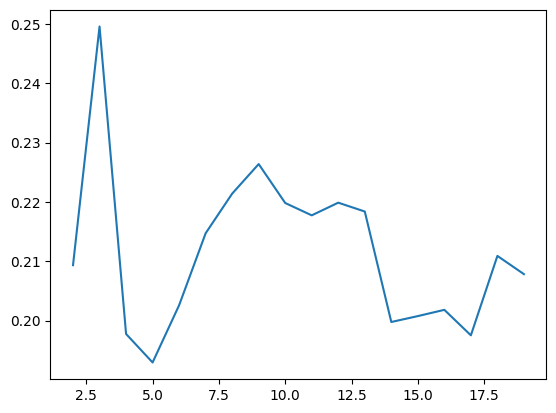

In [9]:
sns.lineplot(y = silhouette, x = range(2, 20));

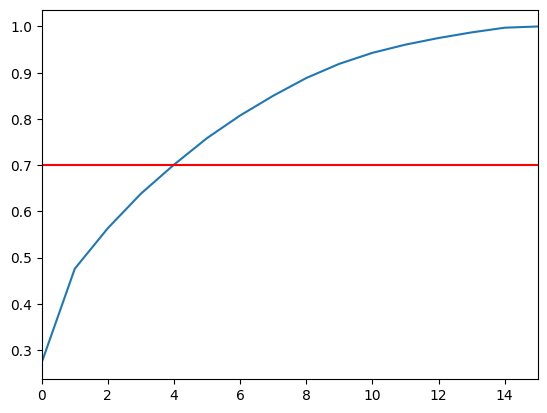

In [10]:
pca = PCA(n_components=X.shape[1])
X_pc = pca.fit_transform(X)
sns.lineplot(y = np.cumsum(pca.explained_variance_ratio_), x = range(X_pc.shape[1]))
sns.lineplot(y = [0.7, 0.7], x = [0, X_pc.shape[1]], color = 'red')
plt.xlim(0, 15);

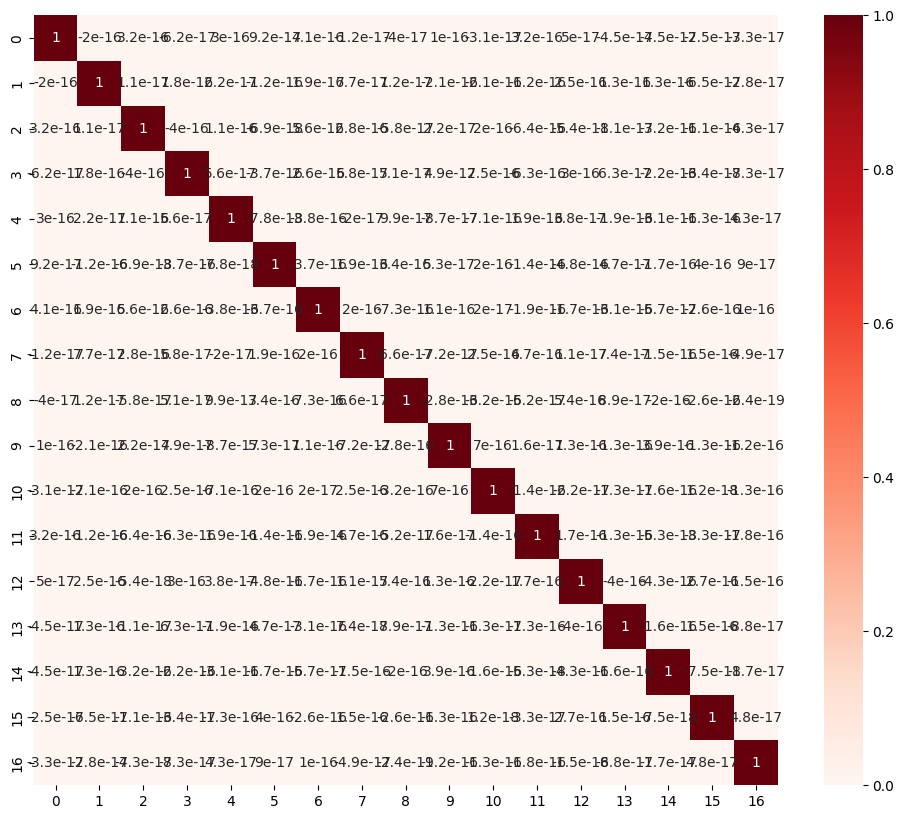

In [11]:
plt.figure(figsize=(12,10))
corr = pd.DataFrame(X_pc).corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

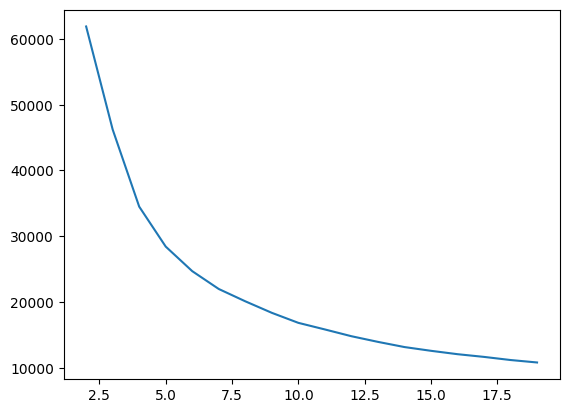

In [12]:
pca = PCA(n_components=3)
X_pc = pca.fit_transform(X)

inertia = []
silhouette = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_pc)
    inertia.append(kmeans.inertia_) 
    silhouette.append(silhouette_score(X_pc, kmeans.fit_predict(X_pc)))
sns.lineplot(y = inertia, x = range(2, 20));

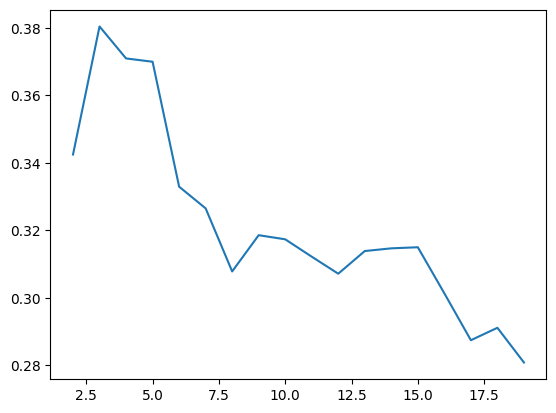

In [13]:
sns.lineplot(y = silhouette, x = range(2, 20));

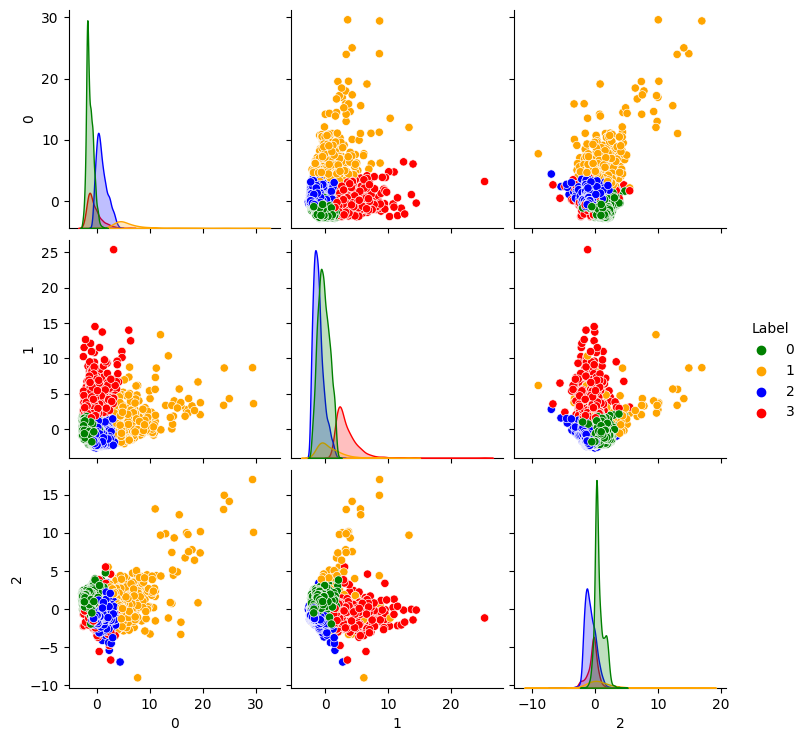

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pc)
df = pd.DataFrame(X_pc)
df['Label'] = kmeans.labels_
sns.pairplot(data = df, hue = 'Label', palette=['green','orange', 'blue', 'red']);